# AoC 2025 Day 9
`

In [ ]:

from aocd.models import Puzzle
from fasthtml.common import show

In [ ]:
puzzle = Puzzle(day=9, year=2025)
puzzle

<Puzzle(2025, 9) at 0x725d9505d460 - Movie Theater>

In [ ]:
def prose(puzzle): return show(puzzle._get_prose(force_precheck=True))

In [ ]:
prose(puzzle)

## Part 1



In [ ]:
exs=puzzle.examples[0].input_data

[tuple(map(int, x.split(","))) for x in exs.splitlines()]


[(7, 1), (11, 1), (11, 7), (9, 7), (9, 5), (2, 5), (2, 3), (7, 3)]

In [ ]:
def parse_data(data):return [tuple(map(int, line.split(","))) for line in data.strip().splitlines()]
xs = parse_data(exs)
xs

[(7, 1), (11, 1), (11, 7), (9, 7), (9, 5), (2, 5), (2, 3), (7, 3)]

Okay, let's discuss this puzzle.

- I have several points on the grid. We're trying to find the biggest rectangle we can make. With two points we can compute the area . The difference between the x-coordinates would be one side, and the difference between the y-coordinates would be the other. Multiplication will give us the area. likely absolute difference will be required
- Also, let's think: if the points fall on the same axis, either x or y, we could potentially skip the computation, avoid the calculation of area, or set it to zero — either way.
- I'm also potentially looking at calculating all the coordinate pairs with something like itertools combinations, avoiding the ones I mentioned in the second point.

Let's discuss. Again, my aim is for you to take the role of a teacher, not provide me code.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Your reasoning is spot on! Let me highlight the key insights you've made:

1. **Area formula**: Exactly right — for two points $(x_1, y_1)$ and $(x_2, y_2)$ as opposite corners, the rectangle area is $|x_2 - x_1| \times |y_2 - y_1|$.


2. **Same-axis filtering**: Good observation. If two points share the same x-coordinate *or* the same y-coordinate, the area is zero. You could either filter these out beforehand, or just let the multiplication naturally give zero. Which approach do you think would be more efficient given the input size?

3. **Combinations**: Yes, `itertools.combinations` with pairs would give you all unique pairs without repetition — perfect for this.

One question for you to consider: the problem says "largest rectangle" — do you need to track anything beyond the maximum area, or is just finding the max sufficient for Part 1?

Correct me if I'm wrong, but I don't think you need to track anything apart from the largest rectangle for Part 1. These largest rectangles can include different points within their area, so there's no condition that needs to be checked beyond calculating the area.

Let's discuss. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You're absolutely correct! The problem only asks for the largest area — it doesn't require the rectangle to contain or exclude any other red tiles. The other tiles are just... tiles. They don't affect the calculation at all.

So your algorithm is simply:
1. Generate all pairs of points
2. Compute area for each pair
3. Return the maximum

That's it! You're ready to implement. Give it a go?

In [ ]:
from itertools import combinations
from typing import NamedTuple

ps = combinations(xs, 2)
next(ps)

((7, 1), (11, 1))

In [ ]:
class Point(NamedTuple):
    x:int
    y:int

def area(p1,p2):
    "area between two points"
    p1, p2 = Point(*p1), Point(*p2)
    return abs((p1.x - p2.x) * (p1.y - p2.y))



In [ ]:
# max area

ps = combinations(xs,2)
for p1, p2 in combinations(xs, 2):
    print(f"P1: {p1}, P2: {p2}, Area: {area(p1, p2)}")

P1: (7, 1), P2: (11, 1), Area: 0
P1: (7, 1), P2: (11, 7), Area: 24
P1: (7, 1), P2: (9, 7), Area: 12
P1: (7, 1), P2: (9, 5), Area: 8
P1: (7, 1), P2: (2, 5), Area: 20
P1: (7, 1), P2: (2, 3), Area: 10
P1: (7, 1), P2: (7, 3), Area: 0
P1: (11, 1), P2: (11, 7), Area: 0
P1: (11, 1), P2: (9, 7), Area: 12
P1: (11, 1), P2: (9, 5), Area: 8
P1: (11, 1), P2: (2, 5), Area: 36
P1: (11, 1), P2: (2, 3), Area: 18
P1: (11, 1), P2: (7, 3), Area: 8
P1: (11, 7), P2: (9, 7), Area: 0
P1: (11, 7), P2: (9, 5), Area: 4
P1: (11, 7), P2: (2, 5), Area: 18
P1: (11, 7), P2: (2, 3), Area: 36
P1: (11, 7), P2: (7, 3), Area: 16
P1: (9, 7), P2: (9, 5), Area: 0
P1: (9, 7), P2: (2, 5), Area: 14
P1: (9, 7), P2: (2, 3), Area: 28
P1: (9, 7), P2: (7, 3), Area: 8
P1: (9, 5), P2: (2, 5), Area: 0
P1: (9, 5), P2: (2, 3), Area: 14
P1: (9, 5), P2: (7, 3), Area: 4
P1: (2, 5), P2: (2, 3), Area: 0
P1: (2, 5), P2: (7, 3), Area: 10
P1: (2, 3), P2: (7, 3), Area: 0


Interesting....this isn't working. Let's discuss why. I think it comes down to my incorrect assumption that points on the same axis don't have any area. They do have an area. Their lines are counted as part of the rectangle's area, one of the examples demos this

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You're onto something important! Look at the example in the puzzle showing the 50-area rectangle between (2,5) and (11,1):

```
..OOOOOOOOO*O*..   <- row 1
..OOOOOOOOOO..   <- row 2
..OOOOOOOOOO..   <- row 3
..OOOOOOOOOO..   <- row 4
..*O*OOOOOOOOO..   <- row 5
```

Count the O's: the rectangle is **10 tiles wide** and **5 tiles tall** → 10 × 5 = 50.

But your formula gives: |11 - 2| × |5 - 1| = 9 × 4 = 36.

What's the difference? The tiles at the corners are *included* in the rectangle. It's not the distance between points — it's the count of tiles from one corner to the other, inclusive.

How would you adjust your area formula to account for this?

In [ ]:
class Point(NamedTuple):
    x:int
    y:int

def area(p1,p2):
    "area between two points and outer line"
    p1, p2 = Point(*p1), Point(*p2)
    return (abs(p1.x - p2.x) + 1) * (abs(p1.y - p2.y) + 1) # include the outer line fix



In [ ]:
# max area

ps = combinations(xs,2)
for p1, p2 in combinations(xs, 2):
    print(f"P1: {p1}, P2: {p2}, Area: {area(p1, p2)}")

P1: (7, 1), P2: (11, 1), Area: 5
P1: (7, 1), P2: (11, 7), Area: 35
P1: (7, 1), P2: (9, 7), Area: 21
P1: (7, 1), P2: (9, 5), Area: 15
P1: (7, 1), P2: (2, 5), Area: 30
P1: (7, 1), P2: (2, 3), Area: 18
P1: (7, 1), P2: (7, 3), Area: 3
P1: (11, 1), P2: (11, 7), Area: 7
P1: (11, 1), P2: (9, 7), Area: 21
P1: (11, 1), P2: (9, 5), Area: 15
P1: (11, 1), P2: (2, 5), Area: 50
P1: (11, 1), P2: (2, 3), Area: 30
P1: (11, 1), P2: (7, 3), Area: 15
P1: (11, 7), P2: (9, 7), Area: 3
P1: (11, 7), P2: (9, 5), Area: 9
P1: (11, 7), P2: (2, 5), Area: 30
P1: (11, 7), P2: (2, 3), Area: 50
P1: (11, 7), P2: (7, 3), Area: 25
P1: (9, 7), P2: (9, 5), Area: 3
P1: (9, 7), P2: (2, 5), Area: 24
P1: (9, 7), P2: (2, 3), Area: 40
P1: (9, 7), P2: (7, 3), Area: 15
P1: (9, 5), P2: (2, 5), Area: 8
P1: (9, 5), P2: (2, 3), Area: 24
P1: (9, 5), P2: (7, 3), Area: 9
P1: (2, 5), P2: (2, 3), Area: 3
P1: (2, 5), P2: (7, 3), Area: 18
P1: (2, 3), P2: (7, 3), Area: 6


In [ ]:
def part_one(data):
    ps = parse_data(data)
    return max(area(p1, p2) for p1, p2 in combinations(ps, 2))

assert part_one(exs) == 50

In [ ]:
part_one(puzzle.input_data)

4729332959

In [ ]:
puzzle.answer_a = 4729332959

## Part 2

Let's discuss part two without giving too much away. Let's break down step by step what my understanding is, based on your prompting questions.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great approach! Go ahead — tell me what you understand about Part 2, and I'll help you refine your thinking as we go.

OK. I sincerely struggle to understand this paragraph, and I need you to attempt to explain it to me:

<In your list, every red tile is connected to the red tile before and after it by a straight line of green tiles. The list wraps, so the first red tile is also connected to the last red tile. Tiles that are adjacent in your list will always be on either the same row or the same column.>

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Think of the red tiles as **vertices of a polygon**, listed in order as you walk around its perimeter.

Looking at the example list:
```
(7,1) → (11,1) → (11,7) → (9,7) → (9,5) → (2,5) → (2,3) → (7,3) → back to (7,1)
```

Each consecutive pair shares either the same x or same y coordinate (so they're on the same row or column). The green tiles fill in the straight line *between* each pair.

For instance:
- (7,1) to (11,1): both have y=1, so green tiles fill x=8,9,10 at y=1
- (11,1) to (11,7): both have x=11, so green tiles fill y=2,3,4,5,6 at x=11

And because "the list wraps," the last point (7,3) connects back to the first point (7,1).

So the red points + green edges form a **closed loop** — a polygon outline. Does that help clarify it?

Yeah, the list wrapping makes sense. It does feel like some kind of walking algorithm, not a random walk, but an algorithm that is constrained by the same-axis condition, with each pair sharing either x or y.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly right! It's a **rectilinear polygon** (also called an orthogonal polygon) — a closed shape where every edge is either perfectly horizontal or perfectly vertical. No diagonals allowed.

So now you have:
- **Red tiles**: the vertices (corners) of the polygon
- **Green tiles**: the edges connecting them, *plus* everything inside the polygon

Given this, what do you think the new constraint means for finding valid rectangles in Part 2?

So I need to find what I believe is just one rectilinear polygon. This means it's now almost a subset of the original grid that we have; the larger main square where all the points would fall is replaced by an orthogonal polygon. The main challenge is then: I need to create rectangular shapes that have to be contained within this irregular shape and extract the one with the largest area.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Spot on! You've nailed the key insight:

1. The red tiles + green edges + interior form an orthogonal polygon
2. Your rectangle must have **red tiles** at opposite corners (same as Part 1)
3. But now **every tile inside the rectangle** must be red or green — meaning it must be entirely contained within the polygon

So the question becomes: for each pair of red tiles, how do you check if the rectangle they form lies entirely within the polygon?

What ideas come to mind for that check?

I still don't know how I'm going to generate these rectangles within the rectilinear polygon. I want to try to focus on solving the initial problem: create the rectilinear polygon.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good plan — one step at a time!

So first: build the polygon. You need to create a set of all tiles that are red or green. That means:

1. **Red tiles**: You already have these — the input points
2. **Green tiles on edges**: Fill in the straight lines between consecutive points (remembering the wrap-around)
3. **Green tiles inside**: Fill the interior of the polygon

For step 2, can you think of how to generate all the points along a horizontal or vertical line between two points?

In [ ]:
# are all points consecutive in the puzle?
pairs = list(zip(xs, xs[1:] + [xs[0]])) # wrap around!
all(p1[0]==p2[0] or p1[1]==p2[1] for p1,p2 in pairs)

True

In [ ]:
p1, p2 = Point(*(7, 1)), Point(*(11, 1))
[(x, p1.y) for x in range(min(p1.x, p2.x), max(p1.x, p2.x) + 1)]

[(7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]

In [ ]:
p1, p2 = Point(*(11, 1)), Point(*(11, 7))
[(p1.x, y) for y in range(min(p1.y, p2.y), max(p1.y, p2.y) + 1)]

[(11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7)]

In [ ]:
xs = parse_data(exs)

In [ ]:
def line_pts(p1, p2):
    "all points on line between p1 and p2 inclusive"
    p1, p2 = Point(*p1), Point(*p2)
    if p1.x == p2.x: return {(p1.x, y) for y in range(min(p1.y, p2.y), max(p1.y, p2.y)+1)}
    return {(x, p1.y) for x in range(min(p1.x, p2.x), max(p1.x, p2.x)+1)}

In [ ]:
p1, p2 = (7, 1), (11, 1)
all_pts = line_pts(p1, p2)
all_pts

{(7, 1), (8, 1), (9, 1), (10, 1), (11, 1)}

In [ ]:
p1, p2 = (11, 1), (11, 7)
all_pts = line_pts(p1, p2)
all_pts

{(11, 1), (11, 2), (11, 3), (11, 4), (11, 5), (11, 6), (11, 7)}

In [ ]:
poly = set()
for p1, p2 in zip(xs, xs[1:] + [xs[0]]):
    all_pts = line_pts(p1, p2)
    poly.update(all_pts)
    
print(poly)
    

{(11, 1), (11, 7), (2, 4), (4, 3), (7, 3), (9, 5), (11, 2), (6, 3), (11, 5), (2, 5), (3, 5), (5, 5), (7, 1), (6, 5), (8, 1), (9, 6), (11, 3), (10, 1), (10, 7), (11, 6), (8, 5), (2, 3), (4, 5), (3, 3), (7, 2), (5, 3), (7, 5), (9, 1), (9, 7), (11, 4)}


In [ ]:
# ai code for visuals
def plot_grid(pts):
    pts = set(pts)
    xs_vals, ys_vals = zip(*pts)
    minx, maxx, miny, maxy = min(xs_vals)-1, max(xs_vals)+1, min(ys_vals)-1, max(ys_vals)+1
    for y in range(miny, maxy+1):
        print(''.join('#' if (x,y) in pts else '.' for x in range(minx, maxx+1)))

def poly_boundary(ps):
    poly = set()
    for p1, p2 in zip(ps, ps[1:] + [ps[0]]): poly.update(line_pts(p1, p2))
    return poly

plot_grid(poly_boundary(xs))

............
......#####.
......#...#.
.######...#.
.#........#.
.########.#.
........#.#.
........###.
............


In [ ]:
xs = parse_data(exs)
red_ps = set(xs)
poly = poly_boundary(xs)
green_ps = poly - red_ps # not sure if neded



OK, the last part is to generate all the boundaries of all possible rectangles with red corners and apply a check: this boundary vs the polygon boundary, meaning all points should be contained in the polygon boundary.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Close, but there's an important distinction! You need to check that **all tiles inside the rectangle** (not just its boundary) are within the polygon. And your polygon currently only has the boundary — you haven't filled in the interior yet.

So you have two sub-problems:

1. **Fill the polygon interior** — so you have a set of all valid tiles (red + green)
2. **For each rectangle**: check that every tile in the rectangle is in that set

For filling the interior, have you encountered algorithms like flood fill or the scanline/ray casting approach before?

No, that's completely new stuff for me. I'm a data scientist learning CS as I go along. Let's learn the simplest of both. I assume flood fill?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Flood fill is like the "paint bucket" tool in image editors! Here's the idea:

1. Start from a point you *know* is inside the polygon
2. Add it to your "filled" set
3. Look at its 4 neighbors (up, down, left, right)
4. For each neighbor: if it's not already filled and not on the boundary, add it and repeat

The tricky part: how do you find a starting point that's definitely inside? One simple approach — pick any boundary point and step one tile inward (but which direction is "inward"?).

For your polygon, can you visually identify a point that's clearly inside?

I mean, in physics, a long time ago I learnt about the centre of mass of a shape or object. Could this be applied here?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Interesting thought! The centroid (average of all vertex coordinates) often lands inside for convex shapes. But this polygon is **concave** (it has that indentation), so the centroid of the vertices might actually fall outside the polygon.

Try computing the centroid of your red points and see where it lands — does it fall inside or outside when you look at your grid visualization?

In [ ]:
# lets calculate the centroid of a shape with n points
poly 
xs, ys = zip(*poly)
(int(sum(xs) / len(poly)), int(sum(ys) / len(poly)))


(7, 3)

No, it's out/border I think... not a good idea for a starting point. What if I calculate simple top x and y and low x and y? The midpoint perhaps falls inside? Easy enough for a starting point.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

That could work! The bounding box midpoint is simple to compute. Try it — find min/max for x and y, take the midpoint, and check visually if it lands inside your polygon.

In [ ]:
xmax = max(p[0] for p in poly)
ymax = max(p[1] for p in poly) 
xmin = min(p[0] for p in poly)
ymin = min(p[1] for p in poly)

print((xmin, ymin), (xmax, ymax))

(2, 1) (11, 7)


In [ ]:
def midpoint(p1, p2):
    p1, p2 = Point(*p1), Point(*p2)
    return ((p1.x + p2.x) // 2, (p1.y + p2.y) // 2)

# example
midpoint((7, 1), (11, 1))


(9, 1)

In [ ]:
# plot in grid
mid = midpoint((xmin, ymin), (xmax, ymax))
print(mid)
plot_grid(poly | {mid})

(6, 4)
............
......#####.
......#...#.
.######...#.
.#...#....#.
.########.#.
........#.#.
........###.
............


OK, let's now work on the flood fill algorithm. Step by step, starting at mid.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great! You've got your starting point (6, 4) which is clearly inside. Now let's build flood fill step by step.

The algorithm needs:
- A **set** to track filled points (start with just the midpoint)
- A **queue** of points to process (also start with the midpoint)
- Your **boundary** to know where to stop

The loop:
1. Pop a point from the queue
2. Look at its 4 neighbors (up, down, left, right)
3. For each neighbor: if it's not in `filled` and not on the `boundary`, add it to both `filled` and the queue
4. Repeat until queue is empty

Can you write the code to get the 4 neighbors of a point like (6, 4)?

8 neighbours vs 4. I assume this is a way not to leak points outside the boundaries.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly right! With 8 neighbors (including diagonals), the fill could "leak" through corners where two boundary points touch diagonally. With 4 neighbors (only up/down/left/right), the axis-aligned boundary acts as a solid wall.

Since your polygon has only horizontal and vertical edges, 4 neighbors is the safe choice. Go ahead and write the neighbor function!

In [ ]:
# for each point look at the 4 neighboors up/down/left/ righ
p = Point(1, 1)
ns = [(0, 1), (0, -1), (1, 0), (-1, 0)]
for dx, dy in ns: 
    print(p.x+dx, p.y+dy)
    

1 2
1 0
2 1
0 1


In [ ]:
def get_neighbors(p):
    p = Point(*p)
    ns = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    return [(p.x+dx, p.y+dy) for dx, dy in ns]

get_neighbors((6, 4))

[(6, 5), (6, 3), (7, 4), (5, 4)]

In [ ]:
queue, filled = [mid], [mid]
p = queue.pop()
ns = get_neighbors(p)
for n in ns:
    if n in filled or n in poly: continue
    filled.append(n)
    queue.append(n)
filled

[(6, 4), (7, 4), (5, 4)]

In [ ]:
plot_grid(poly | set(filled))

............
......#####.
......#...#.
.######...#.
.#..###...#.
.########.#.
........#.#.
........###.
............


In [ ]:
queue, filled = [mid], [mid]
while queue:
    n = queue.pop()
    for n in get_neighbors(n):
        if n in filled or n in poly: continue
        filled.append(n)
        queue.append(n)

filled

[(6, 4),
 (7, 4),
 (5, 4),
 (4, 4),
 (3, 4),
 (8, 4),
 (8, 3),
 (9, 4),
 (9, 3),
 (10, 4),
 (10, 5),
 (10, 3),
 (10, 2),
 (9, 2),
 (8, 2),
 (10, 6)]

In [ ]:
plot_grid(poly | set(filled))

............
......#####.
......#####.
.##########.
.##########.
.##########.
........###.
........###.
............


In [ ]:
def midpoint(boundary):
    xs, ys = zip(*boundary)
    return ((min(xs) + max(xs)) // 2, (min(ys) + max(ys)) // 2)

midpoint(poly)

(6, 4)

In [ ]:
def flood_fill(boundary):
    "Fill interior of polygon from mid point as start point"
    start = midpoint(boundary)
    queue, filled = [start], {start}
    while queue:
        p = queue.pop()
        for n in get_neighbors(p):
            if n in filled or n in boundary: continue
            filled.add(n)
            queue.append(n)
    return filled

plot_grid(poly | flood_fill(poly))

............
......#####.
......#####.
.##########.
.##########.
.##########.
........###.
........###.
............


In [ ]:
xs = parse_data(exs)
red_ps = set(xs)
poly = poly_boundary(xs)
green_ps = poly - red_ps # not sure if neded
poly_fill = poly | flood_fill(poly)


In [ ]:
p1 = (0,0)
p2 = (4,4)

# Other two corners of rectangle sharing axis-aligned sides:
other_corners = [(p1[0], p2[1]), (p2[0], p1[1])]
all_corners = [p1, p2] + other_corners
print(all_corners)


[(0, 0), (4, 4), (0, 4), (4, 0)]


In [ ]:
xs = range(min(p1[0], p2[0]), max(p1[0], p2[0]) + 1)
ys = range(min(p1[1], p2[1]), max(p1[1], p2[1]) + 1)
rect = {(x, y) for x in xs for y in ys}

In [ ]:
plot_grid(rect)

.......
.#####.
.#####.
.#####.
.#####.
.#####.
.......


Wrap this into a function called `rect_fill`. Use Points inside it to improve readability.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

```python
def rect_fill(p1, p2):
    "All points in rectangle with opposite corners p1, p2"
    p1, p2 = Point(*p1), Point(*p2)
    xs, ys = range(min(p1.x, p2.x), max(p1.x, p2.x)+1), range(min(p1.y, p2.y), max(p1.y, p2.y)+1)
    return {(x, y) for x in xs for y in ys}

plot_grid(rect_fill((0,0), (4,4)))
```

In [ ]:
def rect_fill(p1, p2):
    "All points in rectangle with opposite corners p1, p2"
    p1, p2 = Point(*p1), Point(*p2)
    xs, ys = range(min(p1.x, p2.x), max(p1.x, p2.x)+1), range(min(p1.y, p2.y), max(p1.y, p2.y)+1)
    return {(x, y) for x in xs for y in ys}

plot_grid(rect_fill((0,0), (4,4)))

.......
.#####.
.#####.
.#####.
.#####.
.#####.
.......


In [ ]:
{1,2} - {1,2,3}

set()

In [ ]:
top = 0
xs = parse_data(exs)
red_ps = set(xs)
poly = poly_boundary(xs)
poly_fill = poly | flood_fill(poly)
for p1, p2 in combinations(red_ps, 2):
    if not (rect_fill(p1,p2) - poly_fill): 
        print(p1, p2, "-->", area(p1,p2))
        top = max(top, area(p1, p2))


(11, 1) (11, 7) --> 7
(11, 1) (7, 1) --> 5
(11, 1) (7, 3) --> 15
(11, 1) (9, 5) --> 15
(11, 1) (9, 7) --> 21
(11, 7) (9, 5) --> 9
(11, 7) (9, 7) --> 3
(7, 1) (7, 3) --> 3
(7, 1) (9, 5) --> 15
(7, 3) (2, 3) --> 6
(7, 3) (9, 5) --> 9
(7, 3) (2, 5) --> 18
(2, 3) (9, 5) --> 24
(2, 3) (2, 5) --> 3
(9, 5) (2, 5) --> 8
(9, 5) (9, 7) --> 3


Wrap this into a function called "part2." Turn the loop into a comprehension using max and a generator expression.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠

```python
def part_two(data):
    ps = parse_data(data)
    red_ps, poly = set(ps), poly_boundary(ps)
    poly_fill = poly | flood_fill(poly)
    return max(area(p1,p2) for p1,p2 in combinations(red_ps, 2) if not (rect_fill(p1,p2) - poly_fill))

assert part_two(exs) == 24
```

In [ ]:
def part_two(data):
    ps = parse_data(data)
    red_ps, poly = set(ps), poly_boundary(ps)
    poly_fill = poly | flood_fill(poly)
    return max(area(p1,p2) for p1,p2 in combinations(red_ps, 2) if not (rect_fill(p1,p2) - poly_fill))

assert part_two(exs) == 24

In [ ]:
# part_two(puzzle.input_data)



Okay, this isn't working, I'm going to check what is making it slow first

In [ ]:
top = 0
xs = parse_data(puzzle.input_data)
red_ps = set(xs)
poly = poly_boundary(xs)
# poly_fill = poly | flood_fill(poly)


In [ ]:
# max(area(p1,p2) for p1,p2 in combinations(red_ps, 2) if not rect_fill(p1,p2))

Both appear to be quite slow. Now, I did look for hints before solving this on the discord chat, no code more directions so I want you to acknowledge this in my reflection. Coordinate compression is something that interests me, and it was used as this hint. A bit like vocabulary token-to-ID and ID-to-token mapping. I think we could use something like this here.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great analogy! Coordinate compression is exactly like token-to-ID mapping.

The key insight: you don't care about *every* coordinate, only the ones where red points exist. If your x-coordinates are `[2, 7, 9, 11]`, you compress them to `[0, 1, 2, 3]`.

Why does this help here? Your actual coordinates might be in the millions, but you only have ~hundreds of red points. Instead of iterating over a massive grid, you work with a small compressed grid.

For this problem: what if instead of filling/checking individual tiles, you thought about the **regions between** consecutive x and y values of your red points?

What do you think the first step would be to apply compression to your coordinates?
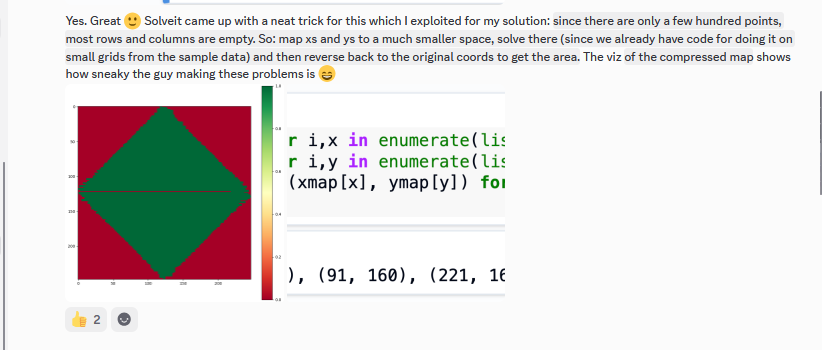

In [ ]:
xs = parse_data(exs)
x_vals = sorted(set(p[0] for p in xs))  # unique xs
y_vals = sorted(set(p[1] for p in xs))  # unique ys 
x_to_i = {x: i for i, x in enumerate(x_vals)}  # real > compressed
y_to_i = {y: i for i, y in enumerate(y_vals)}

i_to_x = {i: x for i, x in enumerate(x_vals)} # compressed > real
i_to_y = {i: y for i, y in enumerate(y_vals)}

In [ ]:
def compress(p, x_to_i, y_to_i): return (x_to_i[p[0]], y_to_i[p[1]])
def decompress(p,i_to_x, i_to_y): return (i_to_x[p[0]], i_to_y[p[1]])

compressed_pts = [compress(p, x_to_i, y_to_i) for p in xs]
print("original--->", xs)
print("compressed--->", compressed_pts)

original---> [(7, 1), (11, 1), (11, 7), (9, 7), (9, 5), (2, 5), (2, 3), (7, 3)]
compressed---> [(1, 0), (3, 0), (3, 3), (2, 3), (2, 2), (0, 2), (0, 1), (1, 1)]


In [ ]:
# compressed
xs = parse_data(exs)
compressed_pts = [compress(p, x_to_i, y_to_i) for p in xs]
poly = poly_boundary(compressed_pts)
poly_fill = poly | flood_fill(poly)
len(poly_fill)

13

In [ ]:
# original
xs = parse_data(exs)
# compressed_pts = [compress(p, x_to_i, y_to_i) for p in xs]
poly = poly_boundary(xs)
poly_fill = poly | flood_fill(poly)
len(poly_fill)

46

In [ ]:
# compressed
xs = parse_data(exs)
compressed_pts = [compress(p, x_to_i, y_to_i) for p in xs]
poly = poly_boundary(compressed_pts)
poly_fill = poly | flood_fill(poly)

In [ ]:
red_ps = set(compressed_pts)
for p1, p2 in combinations(red_ps, 2):
    if not (rect_fill(p1,p2) - poly_fill):
        p1, p2 = decompress(p1, i_to_x, i_to_y), decompress(p2, i_to_x, i_to_y)
        print(p1, p2, "-->", area(p1,p2))
        top = max(top, area(p1, p2))

(2, 3) (7, 3) --> 6
(2, 3) (2, 5) --> 3
(2, 3) (9, 5) --> 24
(7, 3) (11, 1) --> 15
(7, 3) (2, 5) --> 18
(7, 3) (9, 5) --> 9
(7, 3) (7, 1) --> 3
(11, 1) (9, 7) --> 21
(11, 1) (11, 7) --> 7
(11, 1) (9, 5) --> 15
(11, 1) (7, 1) --> 5
(9, 7) (11, 7) --> 3
(9, 7) (9, 5) --> 3
(2, 5) (9, 5) --> 8
(11, 7) (9, 5) --> 9
(9, 5) (7, 1) --> 15


In [ ]:
# compressed
xs = parse_data(puzzle.input_data)
x_vals = sorted(set(p[0] for p in xs))  # unique xs
y_vals = sorted(set(p[1] for p in xs))  # unique ys 
# mappings
x_to_i = {x: i for i, x in enumerate(x_vals)}  # real > compressed
y_to_i = {y: i for i, y in enumerate(y_vals)}
i_to_x = {i: x for i, x in enumerate(x_vals)} # compressed > real
i_to_y = {i: y for i, y in enumerate(y_vals)}

compressed_pts = [compress(p, x_to_i, y_to_i) for p in xs]
poly = poly_boundary(compressed_pts)
# poly_fill = poly | flood_fill(poly)

# red_ps = set(compressed_pts)
# for p1, p2 in combinations(red_ps, 2):
#     if not (rect_fill(p1,p2) - poly_fill):
#         p1, p2 = decompress(p1, i_to_x, i_to_y), decompress(p2, i_to_x, i_to_y)
#         # print(p1, p2, "-->", area(p1,p2))
#         top = max(top, area(p1, p2))

In [ ]:
len(x_vals), len(y_vals), len(compressed_pts)

(247, 248, 496)

Again slow... i wonder if something is off with the midpoint on the concave poly. please provide matplot lib code for plotting the polygon and midpoint.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

```python

import matplotlib.pyplot as plt

xs = parse_data(puzzle.input_data)
compressed_pts = [compress(p, x_to_i, y_to_i) for p in xs]
poly = poly_boundary(compressed_pts)
mid = midpoint(poly)

px, py = zip(*poly)
plt.figure(figsize=(10, 10))
plt.scatter(px, py, s=1, label='boundary')
plt.scatter([mid[0]], [mid[1]], c='red', s=50, label='midpoint')
plt.legend()
plt.title(f"Midpoint: {mid}, in boundary: {mid in poly}")
plt.gca().invert_yaxis()
plt.show()

```

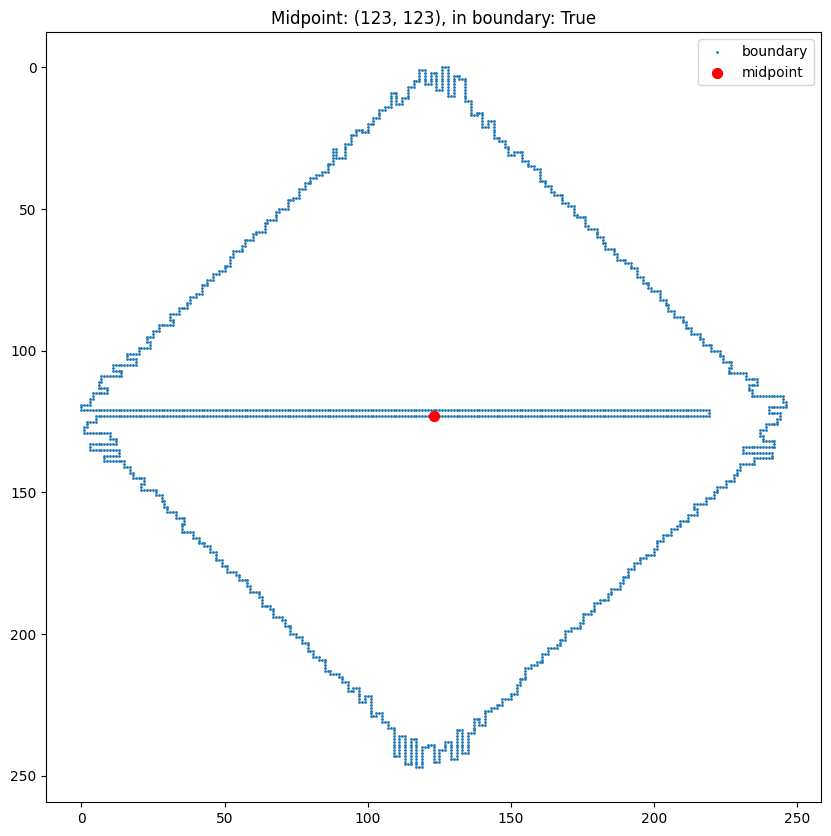

In [ ]:
# AI code to check the compressed grid
import matplotlib.pyplot as plt

xs = parse_data(puzzle.input_data)
compressed_pts = [compress(p, x_to_i, y_to_i) for p in xs]
poly = poly_boundary(compressed_pts)
mid = midpoint(poly)

px, py = zip(*poly)
plt.figure(figsize=(10, 10))
plt.scatter(px, py, s=1, label='boundary')
plt.scatter([mid[0]], [mid[1]], c='red', s=50, label='midpoint')
plt.legend()
plt.title(f"Midpoint: {mid}, in boundary: {mid in poly}")
plt.gca().invert_yaxis()
plt.show()


OK, see where the midpoint is. This is likely outside / boundary of the polygon, so neighbors is not moving on flood fill. It's a strange shape with a valley in the middle. I think `get_neighbors` is getting stuck as it starts outside.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly right! The title confirms it: `in boundary: True` — your midpoint lands directly on the boundary. So when flood fill starts, the starting point is in `boundary`, and it never adds any neighbors.

You need a starting point that's **inside** but not **on** the boundary. One simple fix: from the midpoint, step in a direction (e.g. down one) and check if that point is not on the boundary. Or try a few directions until you find one that's inside.

How would you modify your midpoint/starting logic to handle this?

In [ ]:
flood_fill??


```python
def flood_fill(boundary):
    "Fill interior of polygon from mid point as start point"
    start = midpoint(boundary)
    queue, filled = [start], {start}
    while queue:
        p = queue.pop()
        for n in get_neighbors(p):
            if n in filled or n in boundary: continue
            filled.add(n)
            queue.append(n)
    return filled
```

**File:** `/tmp/ipykernel_825/383141768.py`

In [ ]:
def flood_fill(boundary):
    "Fill interior of polygon from mid point as start point"
    start = midpoint(boundary)
    while start in boundary: start = (start[0], start[1] + 1) # nudge it
    queue, filled = [start], {start}
    while queue:
        p = queue.pop()
        for n in get_neighbors(p):
            if n in filled or n in boundary: continue
            filled.add(n)
            queue.append(n)
    return filled

In [ ]:
# compressed
xs = parse_data(puzzle.input_data)
x_vals = sorted(set(p[0] for p in xs))  # unique xs
y_vals = sorted(set(p[1] for p in xs))  # unique ys 
# mappings
x_to_i = {x: i for i, x in enumerate(x_vals)}  # real > compressed
y_to_i = {y: i for i, y in enumerate(y_vals)}
i_to_x = {i: x for i, x in enumerate(x_vals)} # compressed > real
i_to_y = {i: y for i, y in enumerate(y_vals)}

compressed_pts = [compress(p, x_to_i, y_to_i) for p in xs]
poly = poly_boundary(compressed_pts)
poly_fill = poly | flood_fill(poly)

red_ps = set(compressed_pts)
for p1, p2 in combinations(red_ps, 2):
    if not (rect_fill(p1,p2) - poly_fill):
        p1, p2 = decompress(p1, i_to_x, i_to_y), decompress(p2, i_to_x, i_to_y)
        # print(p1, p2, "-->", area(p1,p2))
        top = max(top, area(p1, p2))

In [ ]:
top


1474477524

In [ ]:
puzzle.answer_b = 1474477524

## Reflection

Part 2 completed. This one was a difficult puzzle. I understood Part 1 fairly easily, the only issue was the inclusion of the borders within the area calculation. Please remind me of a name for this common trap(of by one?) After that, pretty easy to calculate.

Part 2 was a challenge. Firstly, the wrap-around coordinates condition — SolveitAI did nudge me to assess that as a way to create a concave polygon. Note: let's review the difference between concave and convex polygons. It's one of these thinks i need to constantly check and its borderline embarassing. i need a mnemonic that will stick. 

Afterwards, I learnt about flood fill and how it uses its neighbours to fill each pixel on a shape. Note: is this a type of search algorithm? I mean, I am searching around my surroundings for points to fill, until no more points are left. Other algorithms were suggested but not explored , ray casting being one. But not sure if it would make a difference here. more on this later

OK, but after this did not work, I did sneak a peek at a possible way to solve this in the Discord channel (credits to Johno W). Coordinate compression. A smart idea that does not reduce the boundary size, but it does compress the area to a possible minimal space.  The parallel to encoding and decoding tokens to vocab and vice versa was easy for me to understand.

Finally, a bug on my midpoint calculation threw me off , data visuals to the rescue. Sod's law, the midpoint was right on the boundary. Funky valley design of this shape. A small perturbation of the y-axis post-calculation did help. 

Let's discuss my points raised here.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great reflection! Let's go through your questions one at a time.

**The "borders included" issue in Part 1**: This is commonly called the **fencepost problem** (or off-by-one error). The classic example: how many posts do you need for a 100-meter fence with posts every 10 meters? Answer: 11, not 10. In your case, counting tiles from x=2 to x=11 inclusive gives 10 tiles, not 9.

Does that naming ring a bell, or is it new to you?

Yes, off by one is fairly common to me. I was unaware of the fencepost problem naming also; makes sense. Both posts at 0 and 100 are included. To polygons next, any mnemonics to remember? I can often get these confused. A drawing also would help

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠

**Convex vs Concave polygons:**

**Mnemonic**: Think of "**cave**" in con**cave** — it has a "cave" or indentation that goes inward. Convex is the opposite: it bulges outward everywhere.

**The rubber band test**: If you stretch a rubber band around a convex shape, it touches every edge. For a concave shape, the rubber band would skip over the "cave" part.

Here's a simple visual:

```
   CONVEX                    CONCAVE
   
    /\                         /\
   /  \                       /  \
  /    \                     /    \
 /      \                   /  __  \
/________\                 /  /  \  \
                          /__/    \__\
                              ↑
                           "cave"
```

Your AoC polygon had that horizontal valley through the middle — that's the "cave" making it concave!

Cool to filling algorithms (correct me if these are not the proper names to use)

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes, "flood fill" is the proper name! It's part of a family sometimes called **region filling** or **area filling** algorithms in computer graphics.

And you're right to connect it to search algorithms — flood fill is essentially a **graph traversal**. Your implementation used a stack (via `list.pop()`), which makes it **depth-first search (DFS)**. If you used a queue (`collections.deque` with `popleft()`), it would be **breadth-first search (BFS)**.

Both give the same filled result, but they explore in different orders:
- **DFS**: dives deep into one direction before backtracking
- **BFS**: expands outward evenly like ripples in water

Would you like to explore the difference, or move on to ray casting?

In [ ]:
flood_fill??


```python
def flood_fill(boundary):
    "Fill interior of polygon from mid point as start point"
    start = midpoint(boundary)
    while start in boundary: start = (start[0], start[1] + 1) # nudge it
    queue, filled = [start], {start}
    while queue:
        p = queue.pop()
        for n in get_neighbors(p):
            if n in filled or n in boundary: continue
            filled.add(n)
            queue.append(n)
    return filled
```

**File:** `/tmp/ipykernel_825/3549731747.py`

OK, I struggle to understand how pop vs popleft (stack vs queue) can determine DFS vs BFS. Is this linked to what neighbour I process first?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Exactly — it's about the **order** you process nodes.

Imagine you're at point A, and you add neighbors B, C, D to your container:

**Stack (pop → DFS)**: You grab **D** (last added), then explore D's neighbors, then *their* neighbors... diving deep before coming back to B and C.

**Queue (popleft → BFS)**: You grab **B** (first added), then C, then D, processing all "distance 1" neighbors before any "distance 2" neighbors.

Simple example — a line of 4 points: `A → B → C → D`

Starting at A:
- **DFS**: visits A, D, C, B (dives to end first)
- **BFS**: visits A, B, C, D (spreads out evenly)


Not for now, this is clear. Let's move onto different implementations and optimisations

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great! A few optimization directions we could explore:

1. **Ray casting** — an alternative to flood fill for determining if a point is inside a polygon (no need to pre-fill the entire interior)
2. **Early termination** — stop checking a rectangle as soon as you find one point outside the polygon
3. **Smarter rectangle iteration** — instead of checking all pairs, prune impossible candidates based on the polygon structure

Which interests you most?

Ray casting for now. Let's look into it and how it would slot into this solution

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

**Ray casting** determines if a point is inside a polygon by:

1. Cast a ray from the point in any direction (typically horizontal → right)
2. Count how many times it crosses the polygon boundary
3. **Odd** crossings = inside, **Even** crossings = outside

Why does this work? Imagine standing inside a fenced area — to get out, you must cross the fence. If you're outside, you cross the fence to get in, then again to get out. Always pairs!

For your solution, instead of pre-filling the entire polygon with flood fill, you could check each point in a candidate rectangle on-demand using ray casting.

Can you think of how you'd count boundary crossings for a point like (6, 4) going rightward in your example polygon?

OK, I think, given that we are trying to compress the coordinates, flood_fill is a better solution. It's a oneiff cost of filling the polygon after that set diference vs all rectangular pairs. Please review this comment vs ray casting. I dont think much is to be saved here , performance wise

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You're spot on! With coordinate compression:

- **Flood fill**: One-time O(compressed_area) cost, then each rectangle check is fast set operations
- **Ray casting**: Per-point cost every time, with no precomputation benefit

Ray casting shines when:
- The polygon is too large to store in memory
- You only need to check a few points (not thousands of rectangles)
- You can use early termination (bail on first outside point)

In your case, compressed grid is ~247×248, flood fill runs once, and you're checking many rectangle pairs. Flood fill + set difference wins here.

Good analysis!

## Anki cards


ok 4 anki cards to create. fencepost problem for inslusive ranges, flood fill as a way to transverse the graph (BFS/DFS nudge there)
and simple convex vs concave polygons, and pondering about coordenates compression

Lets generate one card parid (Q/A) at the time. Fencepost problem use the fence analogy as it hists home

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

**Card 1 — Fencepost Problem**

**Q:** You need fence posts every 10 meters for a 100-meter fence. How many posts do you need, and what common programming error does this illustrate?

**A:** 11 posts (not 10). This is the **fencepost problem** — when counting items in an inclusive range, the count is `end - start + 1`, not `end - start`. Also called an "off-by-one error."

---

Happy with this one, or want to tweak it?

prefect lets move on. Flood fill. please add code to A part

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

**Card 2: Flood Fill Algorithm**

**Q:** What is flood fill, what category of algorithm is it, and what two data structures determine its traversal order?

**A:** Flood fill is a **graph traversal** algorithm that fills a connected region from a starting point by recursively visiting neighbors. 

- Using a **stack** (pop last) → **DFS** (depth-first)
- Using a **queue** (pop first) → **BFS** (breadth-first)

```python
def flood_fill(boundary, start):
    queue, filled = [start], {start}
    while queue:
        p = queue.pop()  # .pop() = DFS, .popleft() = BFS
        for n in neighbors(p):
            if n not in filled and n not in boundary:
                filled.add(n)
                queue.append(n)
    return filled
```

---

Good?

this is good next, coordenate compression, ive noticed coordenate compression is important when we are dealing with areas/ grid or filling some shape. Am i missing more of its scope

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

You've got the main use case! A few more applications:

- **Sweepline algorithms** — processing events in order without iterating through empty space
- **Range queries** — when building segment trees or similar structures on sparse data
- **Any problem where relative order matters more than absolute values** — if you only care that x₁ < x₂ < x₃, you can use 0, 1, 2 instead of 1000, 50000, 99999

The core insight: coordinate compression helps whenever you have **large coordinate space** but **few distinct values**. You're trading absolute positions for relative ordering.

Want me to draft the card with this broader scope, or keep it focused on the grid/area context you used?

lets keep it foused on the grid area context here, with a mention to relative order vs absolute values as this is linked to the problem. I'm not aware of the other two examples so rather skip these

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

**Card 3: Coordinate Compression**

**Q:** You have a sparse grid with points at x-coordinates [2, 50000, 99999]. How can you efficiently work with this data, and what's this technique called?

**A:** **Coordinate compression** — map large sparse coordinates to small dense indices:

`[2, 50000, 99999] → [0, 1, 2]`

Useful when:
- Grid/area is huge but has few distinct values
- **Relative order matters more than absolute values**
- You need to fill or iterate over a shape

Remember to decompress when computing final answers (e.g., areas).

---

Good to go?

is the question needing more context? regardingpoints shape or what is required? I men here easy to recall but in 6 months...

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good point! Let me add more context:

**Card 3: Coordinate Compression**

**Q:** You're solving a grid problem where points have coordinates like [2, 50000, 99999] and you need to flood fill or check areas. The grid is too large to store. What technique helps, and why does it work?

**A:** **Coordinate compression** — map large sparse coordinates to small dense indices:

`[2, 50000, 99999] → [0, 1, 2]`

Works because **relative order matters more than absolute values** — a rectangle between x=2 and x=50000 has the same *structure* as one between x=0 and x=1.

Remember to decompress when computing final answers (e.g., areas use original values).

---

Clearer?

better, but add small example of compress and decompress also

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠

**Card 3: Coordinate Compression**

**Q:** You're solving a grid problem where points have coordinates like [2, 50000, 99999] and you need to flood fill or check areas. The grid is too large to store. What technique helps, and why does it work?

**A:** **Coordinate compression** — map large sparse coordinates to small dense indices:

`[2, 50000, 99999] → [0, 1, 2]`

Works because **relative order matters more than absolute values** — a rectangle between x=2 and x=50000 has the same *structure* as one between x=0 and x=1.

```python
# Compress
vals = sorted(set(coords))  # [2, 50000, 99999]
to_i = {v: i for i, v in enumerate(vals)}  # {2:0, 50000:1, 99999:2}
compressed = to_i[50000]  # → 1

# Decompress
to_v = {i: v for i, v in enumerate(vals)}
original = to_v[1]  # → 50000
```

Remember to decompress when computing final answers (e.g., areas use original values).

---

Happy with this one?

much better, last card now

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

**Card 4: Convex vs Concave Polygons**

**Q:** What's the difference between convex and concave polygons? How can you remember which is which?

**A:** **Convex**: bulges outward everywhere — a rubber band stretched around it touches every edge.

**Concave**: has an indentation or "cave" going inward — a rubber band would skip over the dent.

**Mnemonic**: con**cave** has a "**cave**" in it.

```
   CONVEX              CONCAVE
    /\                   /\
   /  \                 /  \
  /    \               /    \
 /______\             / ____ \
                     /_/    \_\
                        ↑
                      "cave"
```

---

All four cards done! Want any final tweaks?